## Target Guided Ordinal Encoding

In [1]:
import pandas as pd

In [2]:
#create a dataframe with categorical variable and target variable
df=pd.DataFrame({
    'city':['Bhopal','Mumbai','Delhi','Bhopal','Bangalore','Delhi'],
    'price':[100,300,200,120,250,180]
})

In [3]:
df.head()

,city,price
0,Bhopal,100
1,Mumbai,300
2,Delhi,200
3,Bhopal,120
4,Bangalore,250


In [6]:
# calculate mean price of each city
mean_price=df.groupby('city')['price'].mean().to_dict()
mean_price

{'Bangalore': 250.0, 'Bhopal': 110.0, 'Delhi': 190.0, 'Mumbai': 300.0}

In [7]:
# replace each city with there mean price
df['city_encoded']=df['city'].map(mean_price)

In [8]:
df

,city,price,city_encoded
0,Bhopal,100,110.0
1,Mumbai,300,300.0
2,Delhi,200,190.0
3,Bhopal,120,110.0
4,Bangalore,250,250.0
5,Delhi,180,190.0


In [9]:
# Lets practice this using tips dataset
import seaborn as sns
data=sns.load_dataset('tips')

In [10]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
data['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

<Axes: ylabel='total_bill'>

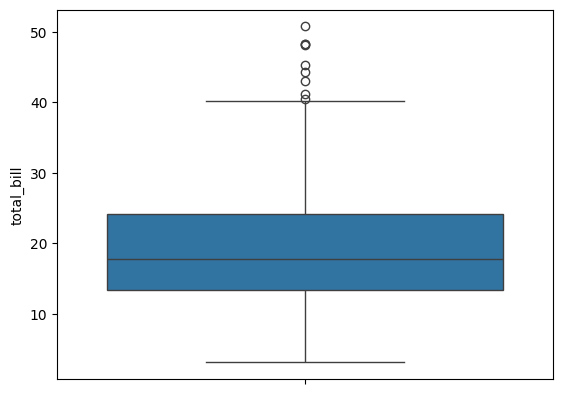

In [13]:
sns.boxplot(data['total_bill'])#yes outlier are available in the dataset

In [15]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [16]:
mean_total_bill=data.groupby('day')['total_bill'].mean().to_dict()

C:\Users\amazon\AppData\Local\Temp\ipykernel_10040\3810399863.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_total_bill=data.groupby('day')['total_bill'].mean().to_dict()


In [17]:
mean_total_bill

{'Thur': 17.682741935483868,
 'Fri': 17.15157894736842,
 'Sat': 20.44137931034483,
 'Sun': 21.41}

In [18]:
data['day_encode']=data['day'].map(mean_total_bill)

In [19]:
data.head()

,total_bill,tip,sex,smoker,day,time,size,day_encode
0,16.99,1.01,Female,No,Sun,Dinner,2,21.41
1,10.34,1.66,Male,No,Sun,Dinner,3,21.41
2,21.01,3.50,Male,No,Sun,Dinner,3,21.41
3,23.68,3.31,Male,No,Sun,Dinner,2,21.41
4,24.59,3.61,Female,No,Sun,Dinner,4,21.41


<Axes: xlabel='total_bill', ylabel='day_encode'>

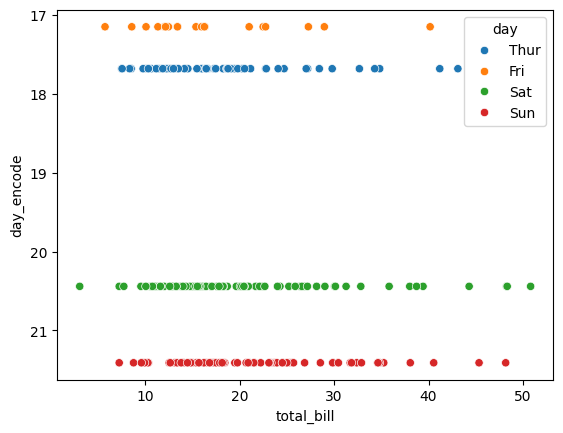

In [24]:
sns.scatterplot(data=data,y='day_encode',x='total_bill',hue='day')

In [25]:
data.head()

,total_bill,tip,sex,smoker,day,time,size,day_encode
0,16.99,1.01,Female,No,Sun,Dinner,2,21.41
1,10.34,1.66,Male,No,Sun,Dinner,3,21.41
2,21.01,3.50,Male,No,Sun,Dinner,3,21.41
3,23.68,3.31,Male,No,Sun,Dinner,2,21.41
4,24.59,3.61,Female,No,Sun,Dinner,4,21.41


In [27]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
day_encode    0
dtype: int64

In [28]:
data['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']